In [250]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import json
import warnings
warnings.filterwarnings("ignore")
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import GridSearchCV

In [2]:
json_file = 'yelp_academic_dataset_business.json'
data = []
with open(json_file, 'r', encoding='utf-8') as f:
    for line in f:
        data.append(json.loads(line))
df_business = pd.DataFrame(data)
df_business.to_csv('yelp_academic_dataset_business.csv', index=False)

In [3]:
json_file = 'yelp_academic_dataset_checkin.json'
data = []
with open(json_file, 'r', encoding='utf-8') as f:
    for line in f:
        data.append(json.loads(line))
df_checkin = pd.DataFrame(data)
df_checkin.to_csv('yelp_academic_dataset_checkin.csv', index=False)

In [4]:
json_file = 'yelp_academic_dataset_review.json'
data = []
with open(json_file, 'r', encoding='utf-8') as f:
    for line in f:
        data.append(json.loads(line))
df_review = pd.DataFrame(data)
df_review.to_csv('yelp_academic_dataset_review.csv', index=False)

In [5]:
json_file = 'yelp_academic_dataset_tip.json'
data = []
with open(json_file, 'r', encoding='utf-8') as f:
    for line in f:
        data.append(json.loads(line))
df_tip = pd.DataFrame(data)
df_tip.to_csv('yelp_academic_dataset_tip.csv', index=False)

In [6]:
json_file = 'yelp_academic_dataset_user.json'
data = []
with open(json_file, 'r', encoding='utf-8') as f:
    for line in f:
        data.append(json.loads(line))
df_user = pd.DataFrame(data)
df_user.to_csv('yelp_academic_dataset_user.csv', index=False)

In [7]:
df_user.head()

,user_id,name,review_count,yelping_since,useful,funny,cool,elite,friends,fans,...,compliment_more,compliment_profile,compliment_cute,compliment_list,compliment_note,compliment_plain,compliment_cool,compliment_funny,compliment_writer,compliment_photos
0,qVc8ODYU5SZjKXVBgXdI7w,Walker,585,2007-01-25 16:47:26,7217,1259,5994,2007,"NSCy54eWehBJyZdG2iE84w, pe42u7DcCH2QmI81NX-8qA...",267,...,65,55,56,18,232,844,467,467,239,180
1,j14WgRoU_-2ZE1aw1dXrJg,Daniel,4333,2009-01-25 04:35:42,43091,13066,27281,"2009,2010,2011,2012,2013,2014,2015,2016,2017,2...","ueRPE0CX75ePGMqOFVj6IQ, 52oH4DrRvzzl8wh5UXyU0A...",3138,...,264,184,157,251,1847,7054,3131,3131,1521,1946
2,2WnXYQFK0hXEoTxPtV2zvg,Steph,665,2008-07-25 10:41:00,2086,1010,1003,"2009,2010,2011,2012,2013","LuO3Bn4f3rlhyHIaNfTlnA, j9B4XdHUhDfTKVecyWQgyA...",52,...,13,10,17,3,66,96,119,119,35,18
3,SZDeASXq7o05mMNLshsdIA,Gwen,224,2005-11-29 04:38:33,512,330,299,"2009,2010,2011","enx1vVPnfdNUdPho6PH_wg, 4wOcvMLtU6a9Lslggq74Vg...",28,...,4,1,6,2,12,16,26,26,10,9
4,hA5lMy-EnncsH4JoR-hFGQ,Karen,79,2007-01-05 19:40:59,29,15,7,,"PBK4q9KEEBHhFvSXCUirIw, 3FWPpM7KU1gXeOM_ZbYMbA...",1,...,1,0,0,0,1,1,0,0,0,0


In [8]:
review_agg = df_review.groupby('business_id').agg({'stars': ['mean', 'count']}).reset_index()
review_agg.columns = ['business_id', 'avg_review_rating', 'review_count']

In [9]:
checkin_agg = df_checkin.groupby('business_id').size().reset_index(name='checkin_count')

In [10]:
tip_agg = df_tip.groupby('business_id').size().reset_index(name='tip_count')

In [11]:
df_merged = pd.merge(df_business, review_agg, on='business_id', how='left')
df_merged = pd.merge(df_merged, checkin_agg, on='business_id', how='left')
df_merged = pd.merge(df_merged, tip_agg, on='business_id', how='left')

In [12]:
df_merged.fillna(0, inplace=True)

In [13]:
df_merged.head()

,business_id,name,address,city,state,postal_code,latitude,longitude,stars,review_count_x,is_open,attributes,categories,hours,avg_review_rating,review_count_y,checkin_count,tip_count
0,Pns2l4eNsfO8kk83dixA6A,"Abby Rappoport, LAC, CMQ","1616 Chapala St, Ste 2",Santa Barbara,CA,93101,34.426679,-119.711197,5.0,7,0,{'ByAppointmentOnly': 'True'},"Doctors, Traditional Chinese Medicine, Naturop...",0,4.857143,7,1.0,0.0
1,mpf3x-BjTdTEA3yCZrAYPw,The UPS Store,87 Grasso Plaza Shopping Center,Affton,MO,63123,38.551126,-90.335695,3.0,15,1,{'BusinessAcceptsCreditCards': 'True'},"Shipping Centers, Local Services, Notaries, Ma...","{'Monday': '0:0-0:0', 'Tuesday': '8:0-18:30', ...",3.133333,15,1.0,1.0
2,tUFrWirKiKi_TAnsVWINQQ,Target,5255 E Broadway Blvd,Tucson,AZ,85711,32.223236,-110.880452,3.5,22,0,"{'BikeParking': 'True', 'BusinessAcceptsCredit...","Department Stores, Shopping, Fashion, Home & G...","{'Monday': '8:0-22:0', 'Tuesday': '8:0-22:0', ...",3.500000,24,1.0,8.0
3,MTSW4McQd7CbVtyjqoe9mw,St Honore Pastries,935 Race St,Philadelphia,PA,19107,39.955505,-75.155564,4.0,80,1,"{'RestaurantsDelivery': 'False', 'OutdoorSeati...","Restaurants, Food, Bubble Tea, Coffee & Tea, B...","{'Monday': '7:0-20:0', 'Tuesday': '7:0-20:0', ...",4.057471,87,1.0,10.0
4,mWMc6_wTdE0EUBKIGXDVfA,Perkiomen Valley Brewery,101 Walnut St,Green Lane,PA,18054,40.338183,-75.471659,4.5,13,1,"{'BusinessAcceptsCreditCards': 'True', 'Wheelc...","Brewpubs, Breweries, Food","{'Wednesday': '14:0-22:0', 'Thursday': '16:0-2...",4.692308,13,1.0,1.0


In [14]:
df_merged.isnull().sum()

business_id          0
name                 0
address              0
city                 0
state                0
postal_code          0
latitude             0
longitude            0
stars                0
review_count_x       0
is_open              0
attributes           0
categories           0
hours                0
avg_review_rating    0
review_count_y       0
checkin_count        0
tip_count            0
dtype: int64

In [15]:
df_merged.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150346 entries, 0 to 150345
Data columns (total 18 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   business_id        150346 non-null  object 
 1   name               150346 non-null  object 
 2   address            150346 non-null  object 
 3   city               150346 non-null  object 
 4   state              150346 non-null  object 
 5   postal_code        150346 non-null  object 
 6   latitude           150346 non-null  float64
 7   longitude          150346 non-null  float64
 8   stars              150346 non-null  float64
 9   review_count_x     150346 non-null  int64  
 10  is_open            150346 non-null  int64  
 11  attributes         150346 non-null  object 
 12  categories         150346 non-null  object 
 13  hours              150346 non-null  object 
 14  avg_review_rating  150346 non-null  float64
 15  review_count_y     150346 non-null  int64  
 16  ch

In [16]:
df_merged.describe

<bound method NDFrame.describe of                    business_id                      name  \
0       Pns2l4eNsfO8kk83dixA6A  Abby Rappoport, LAC, CMQ   
1       mpf3x-BjTdTEA3yCZrAYPw             The UPS Store   
2       tUFrWirKiKi_TAnsVWINQQ                    Target   
3       MTSW4McQd7CbVtyjqoe9mw        St Honore Pastries   
4       mWMc6_wTdE0EUBKIGXDVfA  Perkiomen Valley Brewery   
...                        ...                       ...   
150341  IUQopTMmYQG-qRtBk-8QnA              Binh's Nails   
150342  c8GjPIOTGVmIemT7j5_SyQ      Wild Birds Unlimited   
150343  _QAMST-NrQobXduilWEqSw         Claire's Boutique   
150344  mtGm22y5c2UHNXDFAjaPNw  Cyclery & Fitness Center   
150345  jV_XOycEzSlTx-65W906pg                   Sic Ink   

                                address           city state postal_code  \
0                1616 Chapala St, Ste 2  Santa Barbara    CA       93101   
1       87 Grasso Plaza Shopping Center         Affton    MO       63123   
2                

In [17]:
categorical_features = df_merged.select_dtypes(include=['object', 'category']).columns.tolist()
categorical_features

['business_id',
 'name',
 'address',
 'city',
 'state',
 'postal_code',
 'attributes',
 'categories',
 'hours']

In [19]:
df_merged.drop(columns=['business_id','hours','attributes',
 'name',
 'address',
 'city',
 'state',
 'postal_code',
 'categories'],axis=1,inplace=True)

In [166]:
df_merged['is_open'].value_counts()

is_open
1    119698
0     30648
Name: count, dtype: int64

In [21]:
df_merged.head()

,latitude,longitude,stars,review_count_x,is_open,avg_review_rating,review_count_y,checkin_count,tip_count
0,34.426679,-119.711197,5.0,7,0,4.857143,7,1.0,0.0
1,38.551126,-90.335695,3.0,15,1,3.133333,15,1.0,1.0
2,32.223236,-110.880452,3.5,22,0,3.500000,24,1.0,8.0
3,39.955505,-75.155564,4.0,80,1,4.057471,87,1.0,10.0
4,40.338183,-75.471659,4.5,13,1,4.692308,13,1.0,1.0


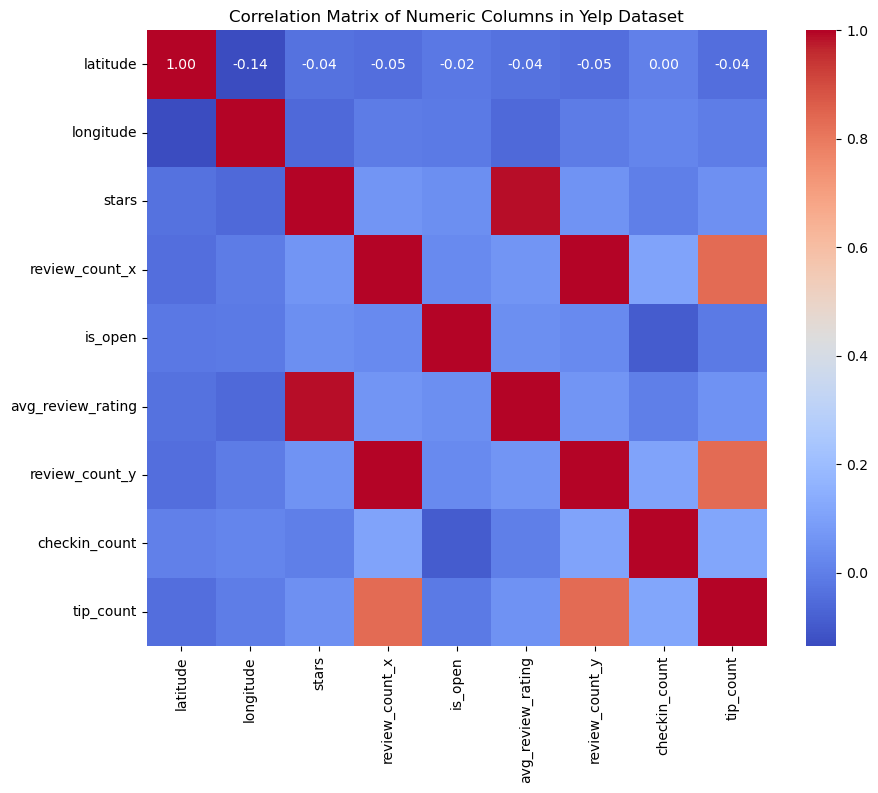

In [251]:

# Filter the dataset to include only numeric columns
numeric_columns = df_merged.select_dtypes(include=['int64','float64'])

# Generate the correlation matrix for only numeric columns
correlation_matrix = numeric_columns.corr()

# Plot the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix of Numeric Columns in Yelp Dataset')
plt.show()

### Separating independent and dependent features

In [22]:
X=df_merged.drop(columns=['is_open'])
y=df_merged['is_open']

### Train-test split

In [23]:
X_train, X_test, y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [24]:
X.duplicated()

0         False
1         False
2         False
3         False
4         False
          ...  
150341    False
150342    False
150343    False
150344    False
150345    False
Length: 150346, dtype: bool

In [25]:
df_merged.corr()

,latitude,longitude,stars,review_count_x,is_open,avg_review_rating,review_count_y,checkin_count,tip_count
latitude,1.000000,-0.135796,-0.036312,-0.046294,-0.016721,-0.036898,-0.045954,0.004080,-0.044968
longitude,-0.135796,1.000000,-0.056114,-0.008820,-0.014275,-0.056279,-0.009285,0.019068,-0.006669
stars,-0.036312,-0.056114,1.000000,0.059876,0.044992,0.986846,0.059244,-0.002254,0.048761
review_count_x,-0.046294,-0.008820,0.059876,1.000000,0.029654,0.063175,0.999785,0.107181,0.833294
is_open,-0.016721,-0.014275,0.044992,0.029654,1.000000,0.043649,0.029956,-0.094479,-0.012334
avg_review_rating,-0.036898,-0.056279,0.986846,0.063175,0.043649,1.000000,0.062523,0.000212,0.052323
review_count_y,-0.045954,-0.009285,0.059244,0.999785,0.029956,0.062523,1.000000,0.108000,0.834424
checkin_count,0.004080,0.019068,-0.002254,0.107181,-0.094479,0.000212,0.108000,1.000000,0.116564
tip_count,-0.044968,-0.006669,0.048761,0.833294,-0.012334,0.052323,0.834424,0.116564,1.000000


### Encoding

In [26]:
X_train_encoded = pd.get_dummies(X_train, drop_first=True)
X_test_encoded = pd.get_dummies(X_test, drop_first=True)

### Scaling

In [27]:

scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train_encoded)
X_test_scaled = scaler.transform(X_test_encoded)

In [186]:
X_train_scaled.shape

(120276, 8)

In [187]:
X_test_scaled.shape

(30070, 8)

### Training Decision Tree Model

In [189]:
dt_classifier = DecisionTreeClassifier(random_state=42)
dt_classifier.fit(X_train_scaled, y_train)


DecisionTreeClassifier(random_state=42)

In [190]:
#Train and Test predictions
train_predictions = dt_classifier.predict(X_train_scaled)
test_predictions = dt_classifier.predict(X_test_scaled)
train_predictions


array([1, 1, 0, ..., 1, 1, 1], dtype=int64)

In [191]:
test_predictions

array([1, 1, 1, ..., 1, 1, 0], dtype=int64)

In [192]:
#Train and Test accuracy
train_accuracy = accuracy_score(y_train, train_predictions)
test_accuracy = accuracy_score(y_test, test_predictions)

In [193]:
train_accuracy

0.9998919152615651

In [194]:
test_accuracy

0.6911539740605255

In [195]:
conf_matrix = confusion_matrix(y_test, y_pred)
print('Decision Tree Confusion Matrix:\n', conf_matrix)

Decision Tree Confusion Matrix:
 [[ 1772  4349]
 [ 4938 19011]]


In [196]:
#Classification Report
dt_report = classification_report(y_test, y_pred)
print('Decision Tree classification Report:\n', dt_report)

Decision Tree classification Report:
               precision    recall  f1-score   support

           0       0.26      0.29      0.28      6121
           1       0.81      0.79      0.80     23949

    accuracy                           0.69     30070
   macro avg       0.54      0.54      0.54     30070
weighted avg       0.70      0.69      0.70     30070



In [197]:
feature_importance = dt_classifier.feature_importances_
feature_importance

array([0.27922928, 0.28051586, 0.02324003, 0.08211424, 0.18487136,
       0.08840002, 0.00334635, 0.05828287])

In [198]:
y_pred_proba_dt = dt_classifier.predict_proba(X_test_scaled)[:, 1]  # Probabilities for the positive class
dt_auc_roc = roc_auc_score(y_test, y_pred_proba_dt)
print(f'Decision Tree AUC-ROC Score: {dt_auc_roc:.2f}')

Decision Tree AUC-ROC Score: 0.54


### Interpretation

### Hyperparameter Tuning Decision Tree

### Round 1: Basic Hyperparameter Tuning

In [216]:
param_grid_dt_1 = {
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
}

dt = DecisionTreeClassifier(random_state=42)
grid_search_dt_1 = GridSearchCV(dt, param_grid_dt_1, scoring='accuracy', cv=5)
grid_search_dt_1.fit(X_train_scaled, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=42),
             param_grid={'max_depth': [None, 10, 20, 30],
                         'min_samples_split': [2, 5, 10]},
             scoring='accuracy')

In [217]:
# Best parameters for Decision Tree (Round 1)
best_dt_1 = grid_search_dt_1.best_estimator_
print("Best Decision Tree Parameters (Round 1):", grid_search_dt_1.best_params_)

Best Decision Tree Parameters (Round 1): {'max_depth': 10, 'min_samples_split': 2}


In [218]:
# Evaluate Decision Tree
y_pred_dt_1 = best_dt_1.predict(X_test_scaled)
print("Decision Tree Accuracy (Round 1):", accuracy_score(y_test, y_pred_dt_1))
print(classification_report(y_test, y_pred_dt_1))

Decision Tree Accuracy (Round 1): 0.7920186232125042
              precision    recall  f1-score   support

           0       0.37      0.03      0.06      6121
           1       0.80      0.99      0.88     23949

    accuracy                           0.79     30070
   macro avg       0.59      0.51      0.47     30070
weighted avg       0.71      0.79      0.72     30070



### Round 2: Intermediate Hyperparameter Tuning

In [222]:
param_grid_dt_2 = {
    'max_depth': [None, 5, 10, 15, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'criterion': ['gini', 'entropy']
}

grid_search_dt_2 = GridSearchCV(dt, param_grid_dt_2, scoring='accuracy', cv=5)
grid_search_dt_2.fit(X_train_scaled, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=42),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [None, 5, 10, 15, 20],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10]},
             scoring='accuracy')

In [223]:
# Best parameters for Decision Tree (Round 2)
best_dt_2 = grid_search_dt_2.best_estimator_
print("Best Decision Tree Parameters (Round 2):", grid_search_dt_2.best_params_)

Best Decision Tree Parameters (Round 2): {'criterion': 'entropy', 'max_depth': 5, 'min_samples_leaf': 1, 'min_samples_split': 2}


In [224]:
# Evaluate Decision Tree (Round 2)
y_pred_dt_2 = best_dt_2.predict(X_test_scaled)
print("Decision Tree Accuracy (Round 2):", accuracy_score(y_test, y_pred_dt_2))
print(classification_report(y_test, y_pred_dt_2))

Decision Tree Accuracy (Round 2): 0.7964083804456269
              precision    recall  f1-score   support

           0       0.49      0.00      0.01      6121
           1       0.80      1.00      0.89     23949

    accuracy                           0.80     30070
   macro avg       0.64      0.50      0.45     30070
weighted avg       0.73      0.80      0.71     30070



### Round 3: Final Hyperparameter Tuning

In [225]:
param_grid_dt_3 = {
    'max_depth': [None, 5, 10, 15, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_leaf_nodes': [None, 10, 20],
    'criterion': ['gini', 'entropy']
}

grid_search_dt_3 = GridSearchCV(dt, param_grid_dt_3, scoring='accuracy', cv=5)
grid_search_dt_3.fit(X_train_scaled, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=42),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [None, 5, 10, 15, 20],
                         'max_leaf_nodes': [None, 10, 20],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10]},
             scoring='accuracy')

In [226]:
# Best parameters for Decision Tree (Round 3)
best_dt_3 = grid_search_dt_3.best_estimator_
print("Best Decision Tree Parameters (Round 3):", grid_search_dt_3.best_params_)

Best Decision Tree Parameters (Round 3): {'criterion': 'entropy', 'max_depth': 5, 'max_leaf_nodes': None, 'min_samples_leaf': 1, 'min_samples_split': 2}


In [227]:
# Evaluate Decision Tree (Round 3)
y_pred_dt_3 = best_dt_3.predict(X_test_scaled)
print("Decision Tree Accuracy (Round 3):", accuracy_score(y_test, y_pred_dt_3))
print(classification_report(y_test, y_pred_dt_3))

Decision Tree Accuracy (Round 3): 0.7964083804456269
              precision    recall  f1-score   support

           0       0.49      0.00      0.01      6121
           1       0.80      1.00      0.89     23949

    accuracy                           0.80     30070
   macro avg       0.64      0.50      0.45     30070
weighted avg       0.73      0.80      0.71     30070



### Feature Importance of Decision Tree 

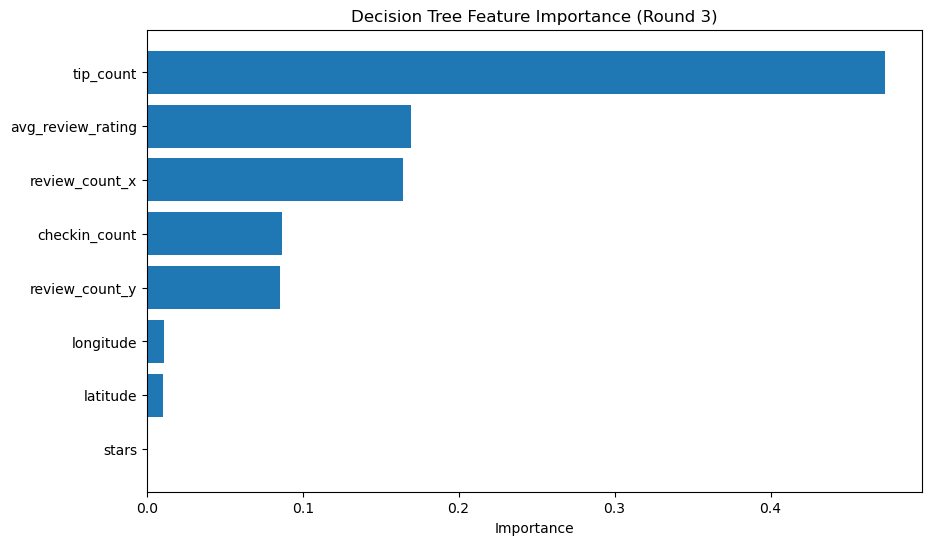

In [242]:
# Convert X_train_scaled back to a DataFrame with the original feature names
X_train_scaled_df = pd.DataFrame(X_train_scaled, columns=X_train.columns)

# Now use the columns from this DataFrame
features = X_train_scaled_df.columns

# Continue with your original code
importance_dt = best_dt_3.feature_importances_
feature_importance_dt = pd.DataFrame({'Feature': features, 'Importance': importance_dt})
feature_importance_dt = feature_importance_dt.sort_values(by='Importance', ascending=False)

# Plot feature importance
plt.figure(figsize=(10,6))
plt.barh(feature_importance_dt['Feature'], feature_importance_dt['Importance'])
plt.title('Decision Tree Feature Importance (Round 3)')
plt.xlabel('Importance')
plt.gca().invert_yaxis()
plt.show()


### Random Forest

In [43]:
from sklearn.ensemble import RandomForestClassifier

In [45]:
# Train Initial Random Forest Model
rf_classifier = RandomForestClassifier(random_state=42)
rf_classifier.fit(X_train_scaled, y_train)

RandomForestClassifier(random_state=42)

In [67]:
#Train and Test predictions
train_predictions_rf = rf_classifier.predict(X_train_scaled)
test_predictions_rf = rf_classifier.predict(X_test_scaled)

In [68]:
train_predictions_rf

array([1, 1, 0, ..., 1, 1, 1], dtype=int64)

In [69]:
test_predictions_rf

array([1, 1, 1, ..., 1, 1, 1], dtype=int64)

In [77]:
#Train and Test accuracy
train_accuracy_rf = accuracy_score(y_train, train_predictions_rf)
test_accuracy_rf_initial = accuracy_score(y_test, test_predictions_rf)

In [75]:
train_accuracy_rf

0.9998919152615651

In [78]:
test_accuracy_rf_initial

0.7791153974060525

In [100]:
conf_matrix = confusion_matrix(y_test, y_pred_rf)
print('Random Forest Confusion matrix:\n', conf_matrix)

Random Forest Confusion matrix:
 [[  682  5439]
 [ 1203 22746]]


In [99]:
class_report = classification_report(y_test, y_pred_rf)
print('Random Forest classification Report:\n', class_report)

Random Forest classification Report:
               precision    recall  f1-score   support

           0       0.36      0.11      0.17      6121
           1       0.81      0.95      0.87     23949

    accuracy                           0.78     30070
   macro avg       0.58      0.53      0.52     30070
weighted avg       0.72      0.78      0.73     30070



In [119]:
y_pred_proba_rf = rf_classifier.predict_proba(X_test_scaled)[:, 1]  # Probabilities for the positive class
rf_auc_roc = roc_auc_score(y_test, y_pred_proba_rf)
print(f'Random Forest AUC-ROC Score: {rf_auc_roc:.2f}')

Random Forest AUC-ROC Score: 0.63


In [50]:
feature_importances = rf_classifier.feature_importances_
feature_importances

array([0.2651675 , 0.26561708, 0.03189291, 0.09630102, 0.15912924,
       0.09702122, 0.00650681, 0.07836422])

### Hyperparameter Tuning Random Forest

### Round 1: Basic Hyperparameter Tuning

In [219]:
param_grid_rf_1 = {
    'n_estimators': [50, 100],
    'max_depth': [None, 10, 20],
}

rf = RandomForestClassifier(random_state=42)
grid_search_rf_1 = GridSearchCV(rf, param_grid_rf_1, scoring='accuracy', cv=5)
grid_search_rf_1.fit(X_train_scaled, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42),
             param_grid={'max_depth': [None, 10, 20],
                         'n_estimators': [50, 100]},
             scoring='accuracy')

In [220]:
# Best parameters for Random Forest (Round 1)
best_rf_1 = grid_search_rf_1.best_estimator_
print("Best Random Forest Parameters (Round 1):", grid_search_rf_1.best_params_)

Best Random Forest Parameters (Round 1): {'max_depth': 10, 'n_estimators': 50}


In [221]:
# Evaluate Random Forest (Round 1)
y_pred_rf_1 = best_rf_1.predict(X_test_scaled)
print("Random Forest Accuracy (Round 1):", accuracy_score(y_test, y_pred_rf_1))
print(classification_report(y_test, y_pred_rf_1))

Random Forest Accuracy (Round 1): 0.7964083804456269
              precision    recall  f1-score   support

           0       0.40      0.00      0.00      6121
           1       0.80      1.00      0.89     23949

    accuracy                           0.80     30070
   macro avg       0.60      0.50      0.44     30070
weighted avg       0.72      0.80      0.71     30070



### Round 2: Intermediate Hyperparameter Tuning

In [ ]:
param_grid_rf_2 = {
    'n_estimators': [50, 100, 200],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

grid_search_rf_2 = GridSearchCV(rf, param_grid_rf_2, scoring='accuracy', cv=5)
grid_search_rf_2.fit(X_train_scaled, y_train)

In [ ]:
# Best parameters for Random Forest (Round 2)
best_rf_2 = grid_search_rf_2.best_estimator_
print("Best Random Forest Parameters (Round 2):", grid_search_rf_2.best_params_)

In [ ]:
# Evaluate Random Forest (Round 2)
y_pred_rf_2 = best_rf_2.predict(X_test_scaled)
print("Random Forest Accuracy (Round 2):", accuracy_score(y_test, y_pred_rf_2))
print(classification_report(y_test, y_pred_rf_2))

### Round 3: Final Hyperparameter Tuning

In [ ]:
param_grid_rf_3 = {
    'n_estimators': [100, 200, 300],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}

grid_search_rf_3 = GridSearchCV(rf, param_grid_rf_3, scoring='accuracy', cv=5)
grid_search_rf_3.fit(X_train_scaled, y_train)

In [ ]:
# Best parameters for Random Forest (Round 3)
best_rf_3 = grid_search_rf_3.best_estimator_
print("Best Random Forest Parameters (Round 3):", grid_search_rf_3.best_params_)

In [ ]:
# Evaluate Random Forest (Round 3)
y_pred_rf_3 = best_rf_3.predict(X_test_scaled)
print("Random Forest Accuracy (Round 3):", accuracy_score(y_test, y_pred_rf_3))
print(classification_report(y_test, y_pred_rf_3))

### Feature Importance of Random Forest

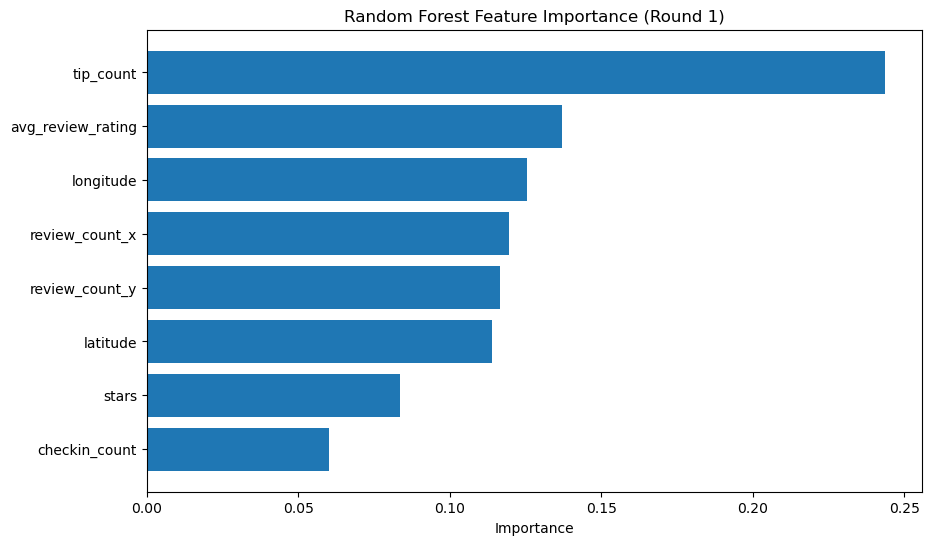

In [244]:
# Convert X_train_scaled back to a DataFrame with the original feature names
X_train_scaled_df_rf = pd.DataFrame(X_train_scaled, columns=X_train.columns)

# Now use the columns from this DataFrame
features_rf = X_train_scaled_df_rf.columns

# Continue with your original code
importance_dt_rf = best_rf_1.feature_importances_
feature_importance_dt_rf = pd.DataFrame({'Feature': features, 'Importance': importance_dt_rf})
feature_importance_dt_rf = feature_importance_dt_rf.sort_values(by='Importance', ascending=False)

# Plot feature importance
plt.figure(figsize=(10,6))
plt.barh(feature_importance_dt_rf['Feature'], feature_importance_dt_rf['Importance'])
plt.title('Random Forest Feature Importance (Round 1)')
plt.xlabel('Importance')
plt.gca().invert_yaxis()
plt.show()

### AdaBoost

In [81]:
from sklearn.ensemble import AdaBoostClassifier

In [82]:
# Initialize and train the AdaBoost model
# Using a Decision Tree as the base estimator
base_estimator = DecisionTreeClassifier(max_depth=1)  # Weak learner
ada_classifier = AdaBoostClassifier(base_estimator=base_estimator, n_estimators=100, random_state=42)
ada_classifier.fit(X_train_scaled, y_train)

AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=1),
                   n_estimators=100, random_state=42)

In [83]:
#Make predictions on the training and test data
y_train_pred_ada = ada_classifier.predict(X_train_scaled)
y_test_pred_ada = ada_classifier.predict(X_test_scaled)

In [84]:
y_train_pred_ada

array([1, 1, 1, ..., 1, 1, 1], dtype=int64)

In [85]:
y_test_pred_ada

array([1, 1, 1, ..., 1, 1, 1], dtype=int64)

In [88]:
#Accuracy of train and test
ada_train_accuracy = accuracy_score(y_train, y_train_pred_ada)
ada_test_accuracy = accuracy_score(y_test, y_test_pred_ada)

In [89]:
ada_train_accuracy

0.7959942133093884

In [90]:
ada_test_accuracy

0.7971400066511474

In [92]:
# Confusion Matrix
ada_confusion_matrix = confusion_matrix(y_test, y_test_pred_ada)
print('AdaBoost Confusion Matrix:\n', ada_confusion_matrix)

AdaBoost Confusion Matrix:
 [[  129  5992]
 [  108 23841]]


In [94]:
#Classification Report
ada_report = classification_report(y_test, y_test_pred_ada)
print('AdaBoost classification Report:\n', ada_report)

AdaBoost classification Report:
               precision    recall  f1-score   support

           0       0.54      0.02      0.04      6121
           1       0.80      1.00      0.89     23949

    accuracy                           0.80     30070
   macro avg       0.67      0.51      0.46     30070
weighted avg       0.75      0.80      0.71     30070



In [115]:
from sklearn.metrics import roc_auc_score

# Step 8: AUC-ROC Score for AdaBoost
y_pred_proba_ada = ada_classifier.predict_proba(X_test_scaled)[:, 1]  # Probabilities for the positive class
ada_auc_roc = roc_auc_score(y_test, y_pred_proba_ada)
print(f'AdaBoost AUC-ROC Score: {ada_auc_roc:.2f}')

AdaBoost AUC-ROC Score: 0.67


### Hyperparameter tuning AdaBoost

### Round 1: Basic Hyperparameter Tuning

In [229]:
param_grid_ab_1 = {
    'n_estimators': [50, 100],
    'learning_rate': [0.01, 0.1],
}

ab = AdaBoostClassifier(random_state=42)
grid_search_ab_1 = GridSearchCV(ab, param_grid_ab_1, scoring='accuracy', cv=5)
grid_search_ab_1.fit(X_train_scaled, y_train)

GridSearchCV(cv=5, estimator=AdaBoostClassifier(random_state=42),
             param_grid={'learning_rate': [0.01, 0.1],
                         'n_estimators': [50, 100]},
             scoring='accuracy')

In [230]:
# Best parameters for AdaBoost (Round 1)
best_ab_1 = grid_search_ab_1.best_estimator_
print("Best AdaBoost Parameters (Round 1):", grid_search_ab_1.best_params_)

Best AdaBoost Parameters (Round 1): {'learning_rate': 0.01, 'n_estimators': 50}


In [231]:
# Evaluate AdaBoost (Round 1)
y_pred_ab_1 = best_ab_1.predict(X_test_scaled)
print("AdaBoost Accuracy (Round 1):", accuracy_score(y_test, y_pred_ab_1))
print(classification_report(y_test, y_pred_ab_1))

AdaBoost Accuracy (Round 1): 0.7964416361822414
              precision    recall  f1-score   support

           0       0.00      0.00      0.00      6121
           1       0.80      1.00      0.89     23949

    accuracy                           0.80     30070
   macro avg       0.40      0.50      0.44     30070
weighted avg       0.63      0.80      0.71     30070



### Round 2: Intermediate Hyperparameter Tuning

In [238]:
param_grid_ab_2 = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 1.0],
    'base_estimator': [None, DecisionTreeClassifier(max_depth=3)]
}

grid_search_ab_2 = GridSearchCV(ab, param_grid_ab_2, scoring='accuracy', cv=5)
grid_search_ab_2.fit(X_train_scaled, y_train)

GridSearchCV(cv=5, estimator=AdaBoostClassifier(random_state=42),
             param_grid={'base_estimator': [None,
                                            DecisionTreeClassifier(max_depth=3)],
                         'learning_rate': [0.01, 0.1, 1.0],
                         'n_estimators': [50, 100, 200]},
             scoring='accuracy')

In [239]:
# Best parameters for AdaBoost (Round 2)
best_ab_2 = grid_search_ab_2.best_estimator_
print("Best AdaBoost Parameters (Round 2):", grid_search_ab_2.best_params_)

Best AdaBoost Parameters (Round 2): {'base_estimator': DecisionTreeClassifier(max_depth=3), 'learning_rate': 0.1, 'n_estimators': 200}


In [240]:
y_pred_ab_2 = best_ab_2.predict(X_test_scaled)
print("AdaBoost Accuracy (Round 2):", accuracy_score(y_test, y_pred_ab_2))
print(classification_report(y_test, y_pred_ab_2))

AdaBoost Accuracy (Round 2): 0.7979714000665115
              precision    recall  f1-score   support

           0       0.62      0.02      0.04      6121
           1       0.80      1.00      0.89     23949

    accuracy                           0.80     30070
   macro avg       0.71      0.51      0.46     30070
weighted avg       0.76      0.80      0.71     30070



### Round 3: Final Hyperparameter Tuning

In [ ]:
param_grid_ab_3 = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 1.0],
    'base_estimator': [None, DecisionTreeClassifier(max_depth=2), DecisionTreeClassifier(max_depth=3)],
    'algorithm': ['SAMME', 'SAMME.R']
}

grid_search_ab_3 = GridSearchCV(ab, param_grid_ab_3, scoring='accuracy', cv=5)
grid_search_ab_3.fit(X_train_scaled, y_train)

In [ ]:
# Best parameters for AdaBoost (Round 3)
best_ab_3 = grid_search_ab_3.best_estimator_
print("Best AdaBoost Parameters (Round 3):", grid_search_ab_3.best_params_)

In [ ]:
# Evaluate AdaBoost (Round 3)
y_pred_ab_3 = best_ab_3.predict(X_test_scaled)
print("AdaBoost Accuracy (Round 3):", accuracy_score(y_test, y_pred_ab_3))
print(classification_report(y_test, y_pred_ab_3))

### Feature Importance AdaBoost 

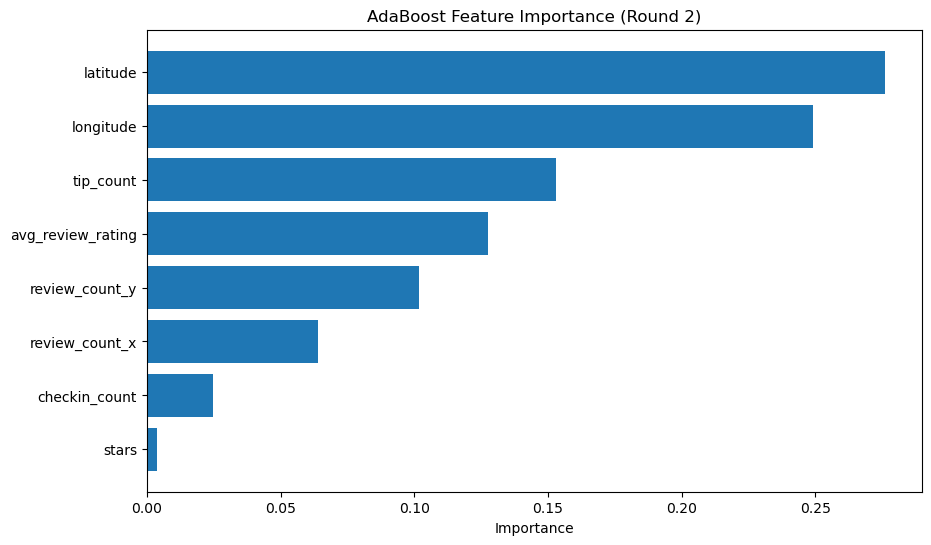

In [247]:
# Convert X_train_scaled back to a DataFrame with the original feature names
X_train_scaled_df_ab = pd.DataFrame(X_train_scaled, columns=X_train.columns)

# Now use the columns from this DataFrame
features_ab = X_train_scaled_df_ab.columns

# Continue with your original code
importance_dt_ab = best_ab_2.feature_importances_
feature_importance_dt_ab = pd.DataFrame({'Feature': features, 'Importance': importance_dt_ab})
feature_importance_dt_ab = feature_importance_dt_ab.sort_values(by='Importance', ascending=False)

# Plot feature importance
plt.figure(figsize=(10,6))
plt.barh(feature_importance_dt_ab['Feature'], feature_importance_dt_ab['Importance'])
plt.title('AdaBoost Feature Importance (Round 2)')
plt.xlabel('Importance')
plt.gca().invert_yaxis()
plt.show()

### XGBOOST 

In [103]:
from xgboost import XGBClassifier

In [105]:
#Initialize and train the XGBoost model
xgb_classifier = XGBClassifier(use_label_encoder=False, eval_metric='mlogloss', random_state=42)
xgb_classifier.fit(X_train_scaled, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='mlogloss',
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, random_state=42, ...)

In [106]:
#Make predictions on the training and test data
y_train_pred_xgb = xgb_classifier.predict(X_train_scaled)
y_test_pred_xgb = xgb_classifier.predict(X_test_scaled)

In [107]:
y_train_pred_xgb

array([1, 1, 1, ..., 1, 1, 1])

In [108]:
y_test_pred_xgb

array([1, 1, 1, ..., 1, 1, 1])

In [109]:
#Accuracy of train and test
xgb_train_accuracy = accuracy_score(y_train, y_train_pred_xgb)
xgb_test_accuracy = accuracy_score(y_test, y_test_pred_xgb)

In [110]:
xgb_train_accuracy

0.8087980977086036

In [111]:
xgb_test_accuracy

0.7981044230129697

In [112]:
# Confusion Matrix
xgb_confusion_matrix = confusion_matrix(y_test, y_test_pred_xgb)
print('XGBoost Confusion Matrix:\n', xgb_confusion_matrix)

XGBoost Confusion Matrix:
 [[  472  5649]
 [  422 23527]]


In [113]:
#Classification Report
xgb_report = classification_report(y_test, y_test_pred_xgb)
print('XGBoost classification Report:\n', xgb_report)

XGBoost classification Report:
               precision    recall  f1-score   support

           0       0.53      0.08      0.13      6121
           1       0.81      0.98      0.89     23949

    accuracy                           0.80     30070
   macro avg       0.67      0.53      0.51     30070
weighted avg       0.75      0.80      0.73     30070



In [116]:
y_pred_proba_xgb = xgb_classifier.predict_proba(X_test_scaled)[:, 1]  # Probabilities for the positive class
xgb_auc_roc = roc_auc_score(y_test, y_pred_proba_xgb)
print(f'XGBoost AUC-ROC Score: {xgb_auc_roc:.2f}')

XGBoost AUC-ROC Score: 0.69


### Hyperparameter Tuning XGBoost

### Round 1: Basic Hyperparameter Tuning

In [232]:
param_grid_xgb_1 = {
    'n_estimators': [50, 100],
    'max_depth': [3, 5],
    'learning_rate': [0.01, 0.1],
}

xgb = XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='mlogloss')
grid_search_xgb_1 = GridSearchCV(xgb, param_grid_xgb_1, scoring='accuracy', cv=5)
grid_search_xgb_1.fit(X_train_scaled, y_train)

GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False,
                                     eval_metric='mlogloss', feature_types=None,
                                     gamma=None, grow_policy=None,
                                     importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate...
                                     max_cat_threshold=None,
                                     max_cat_to_onehot=None,
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=None, num_parallel_tree=None,
                                     random_state=42, ...),
             param_grid={'learning_rate': [0.01, 0.1], 'max_depth': [3, 5],
                         'n_estimators': [50, 100]},
             scoring='accuracy')

In [233]:
# Best parameters for XGBoost (Round 1)
best_xgb_1 = grid_search_xgb_1.best_estimator_
print("Best XGBoost Parameters (Round 1):", grid_search_xgb_1.best_params_)

Best XGBoost Parameters (Round 1): {'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 100}


In [234]:
# Evaluate XGBoost (Round 1)
y_pred_xgb_1 = best_xgb_1.predict(X_test_scaled)
print("XGBoost Accuracy (Round 1):", accuracy_score(y_test, y_pred_xgb_1))
print(classification_report(y_test, y_pred_xgb_1))

XGBoost Accuracy (Round 1): 0.7977053541735949
              precision    recall  f1-score   support

           0       0.57      0.03      0.05      6121
           1       0.80      0.99      0.89     23949

    accuracy                           0.80     30070
   macro avg       0.68      0.51      0.47     30070
weighted avg       0.75      0.80      0.72     30070



### Round 2: Intermediate Hyperparameter Tuning

In [235]:
param_grid_xgb_2 = {
    'n_estimators': [100, 200],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1, 0.2],
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.8, 1.0],
}

grid_search_xgb_2 = GridSearchCV(xgb, param_grid_xgb_2, scoring='accuracy', cv=5)
grid_search_xgb_2.fit(X_train_scaled, y_train)

GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False,
                                     eval_metric='mlogloss', feature_types=None,
                                     gamma=None, grow_policy=None,
                                     importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate...
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=None, num_parallel_tree=None,
                                     random_state=42, ...),
             param_grid={'colsample_bytree': [0.8, 1.0],
                         'learning_rate': [0.01, 0.1, 0.2],
                         'max_depth': [3, 5, 7], 'n_estimators': [100, 200],
                         'subsample': [0.8, 1.0]},
             scoring='accuracy')

In [236]:
# Best parameters for XGBoost (Round 2)
best_xgb_2 = grid_search_xgb_2.best_estimator_
print("Best XGBoost Parameters (Round 2):", grid_search_xgb_2.best_params_)

Best XGBoost Parameters (Round 2): {'colsample_bytree': 1.0, 'learning_rate': 0.2, 'max_depth': 5, 'n_estimators': 200, 'subsample': 1.0}


In [237]:
# Evaluate XGBoost (Round 2)
y_pred_xgb_2 = best_xgb_2.predict(X_test_scaled)
print("XGBoost Accuracy (Round 2):", accuracy_score(y_test, y_pred_xgb_2))
print(classification_report(y_test, y_pred_xgb_2))

XGBoost Accuracy (Round 2): 0.7979714000665115
              precision    recall  f1-score   support

           0       0.53      0.07      0.12      6121
           1       0.81      0.98      0.89     23949

    accuracy                           0.80     30070
   macro avg       0.67      0.53      0.50     30070
weighted avg       0.75      0.80      0.73     30070



### Round 3: Final Hyperparameter Tuning

In [ ]:
param_grid_xgb_3 = {
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 5, 7, 9],
    'learning_rate': [0.01, 0.1, 0.2],
    'subsample': [0.8, 0.9, 1.0],
    'colsample_bytree': [0.8, 0.9, 1.0],
    'gamma': [0, 0.1, 0.2],
    'reg_lambda': [0, 0.1, 1],
    'reg_alpha': [0, 0.1, 1]
}

grid_search_xgb_3 = GridSearchCV(xgb, param_grid_xgb_3, scoring='accuracy', cv=5)
grid_search_xgb_3.fit(X_train_, y_train)

In [ ]:
# Best parameters for XGBoost (Round 3)
best_xgb_3 = grid_search_xgb_3.best_estimator_
print("Best XGBoost Parameters (Round 3):", grid_search_xgb_3.best_params_)

In [ ]:
# Evaluate XGBoost (Round 3)
y_pred_xgb_3 = best_xgb_3.predict(X_test_scaled)
print("XGBoost Accuracy (Round 3):", accuracy_score(y_test, y_pred_xgb_3))
print(classification_report(y_test, y_pred_xgb_3))

### Feature Importance XGBoost

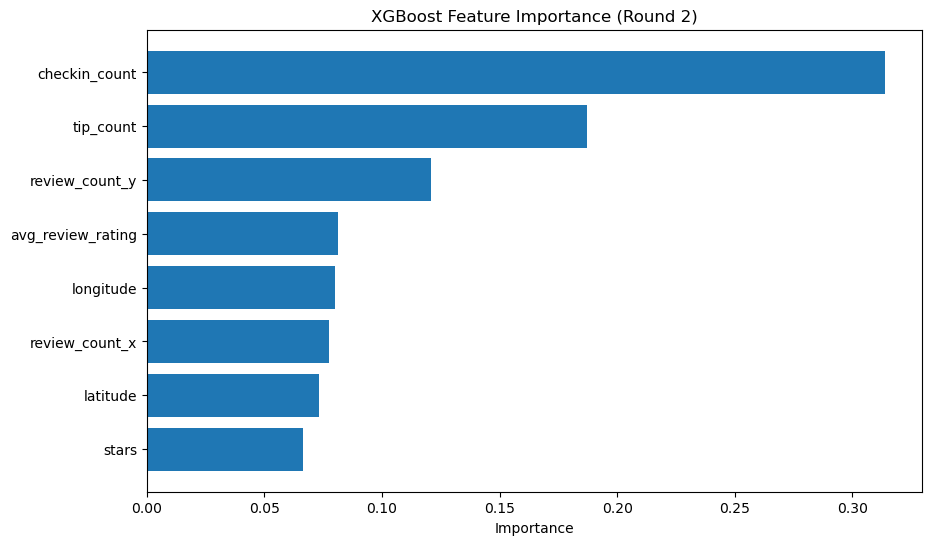

In [248]:
# Convert X_train_scaled back to a DataFrame with the original feature names
X_train_scaled_df_xg = pd.DataFrame(X_train_scaled, columns=X_train.columns)

# Now use the columns from this DataFrame
features_xg = X_train_scaled_df_xg.columns

# Continue with your original code
importance_dt_xg = best_xgb_2.feature_importances_
feature_importance_dt_xg = pd.DataFrame({'Feature': features, 'Importance': importance_dt_xg})
feature_importance_dt_xg = feature_importance_dt_xg.sort_values(by='Importance', ascending=False)

# Plot feature importance
plt.figure(figsize=(10,6))
plt.barh(feature_importance_dt_xg['Feature'], feature_importance_dt_xg['Importance'])
plt.title('XGBoost Feature Importance (Round 2)')
plt.xlabel('Importance')
plt.gca().invert_yaxis()
plt.show()

In [256]:
import pickle

In [266]:
# Specify the file path where you want to save the pickle file
model_filename ='best_dt_3.pkl'
# Open the file in write-binary mode and save the model
with open (model_filename,'wb') as file:     
    pickle.dump(best_dt_3, file)

In [267]:
# Specify the file path where you want to save the pickle file
model_filename ='best_rf_1.pkl'
# Open the file in write-binary mode and save the model
with open (model_filename,'wb') as file:     
    pickle.dump(best_rf_1, file)

In [268]:
# Specify the file path where you want to save the pickle file
model_filename ='best_ab_2.pkl'
# Open the file in write-binary mode and save the model
with open (model_filename,'wb') as file:     
    pickle.dump(best_ab_2, file)

In [269]:
# Specify the file path where you want to save the pickle file
model_filename ='best_xgb_2.pkl'
# Open the file in write-binary mode and save the model
with open (model_filename,'wb') as file:     
    pickle.dump(best_xgb_2, file)